# Import Libraries
<hr>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree


# Load data from csv file

In [1]:
df = pd.read_csv("class_ml.csv")
df.dtypes

NameError: name 'pd' is not defined

<h1>Data Visualization and Analysis</h1>

In [16]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

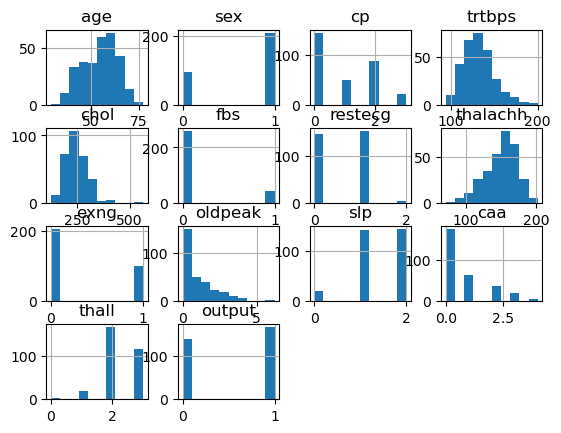

In [17]:
df.hist()

# Define feature sets

In [18]:
features_df = df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh","exng", "oldpeak", "slp", "caa", "thall"]].values
X = np.asarray(features_df)
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [19]:
result_df = df[["output"]].values
Y = np.asarray(result_df)
Y[:5]
Y=Y.ravel()

# Train & Test split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.18, random_state = 5)
print ("Train: ", x_train.shape, y_train.shape)
print ("Test: ", x_test.shape, y_test.shape)

Train:  (248, 13) (248,)
Test:  (55, 13) (55,)


<h1>Classification:</h1>
<br>
<h2>Decision tree</h2>


In [21]:
tree_ = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

In [22]:
tree_.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Prediction

In [23]:
yhat = tree_.predict(x_test)

In [24]:
print(yhat)
print(y_test)


[1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1]
[0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1]


# Evaluate our model accuracy

In [25]:
print("Decision Tree accuracy: ", metrics.accuracy_score(y_test, yhat))

Decision Tree accuracy:  0.9454545454545454


# Evaluate base on jaccard_score

### In jaccard_score evaluation we cac get the percentage of our success!

in this model, 90% of situations the model is predictinc great without any kind of problem.

In [26]:
jaccard_score (y_test, yhat, pos_label=1)

0.9

<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


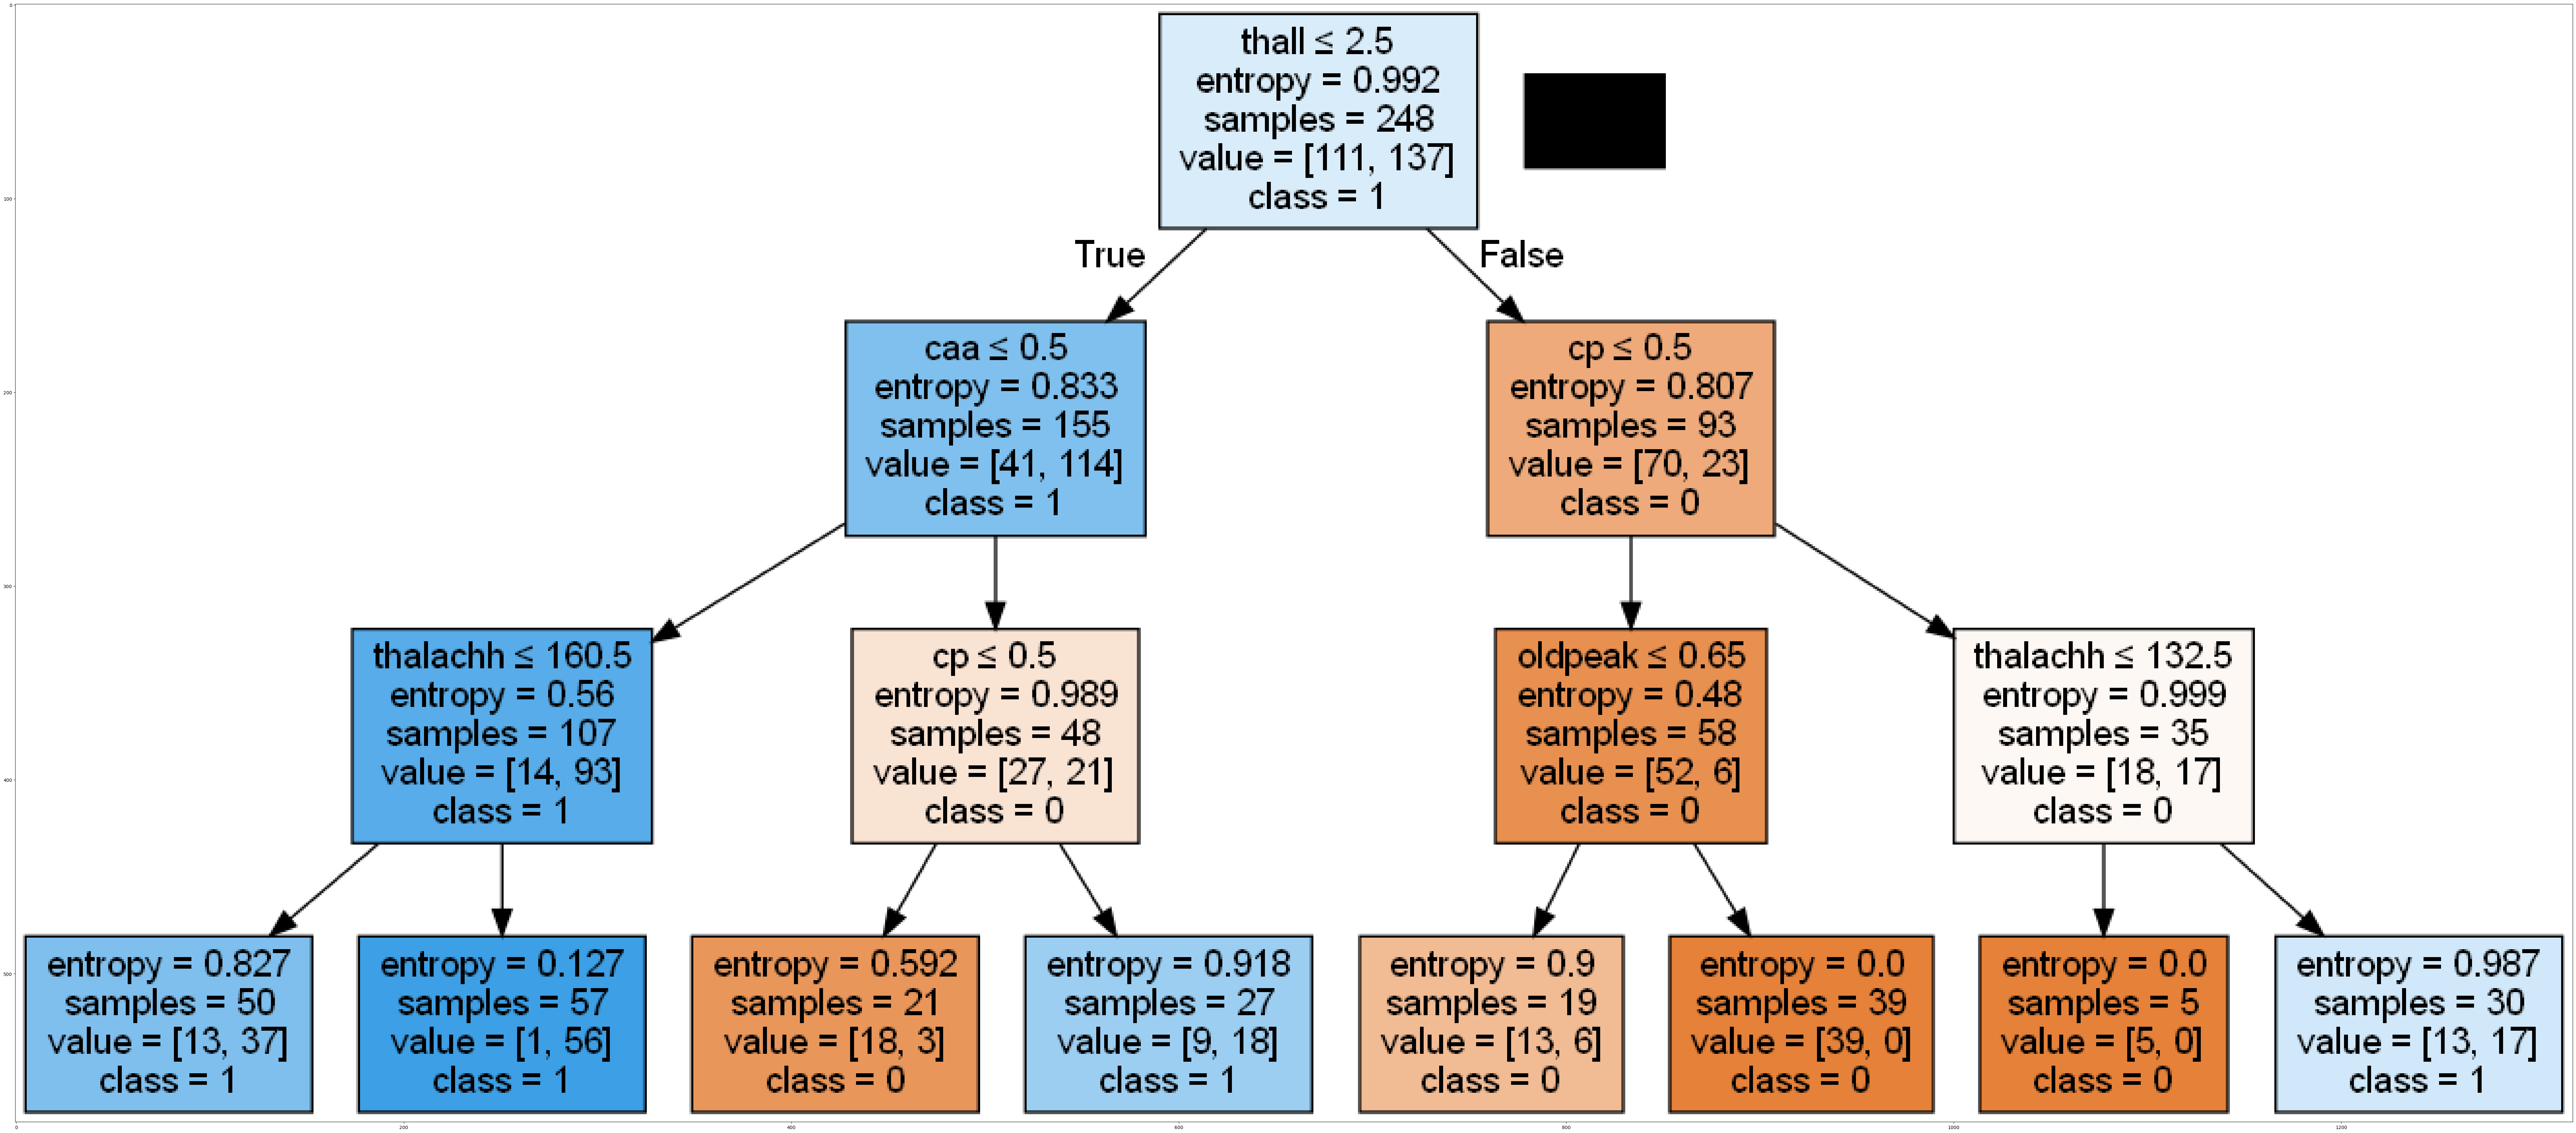

In [27]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:13]
out=tree.export_graphviz(tree_,feature_names=featureNames, out_file=dot_data, class_names=[str(class_name) for class_name in np.unique(y_train) ], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


# Among all the models I used for prediction, Decision Tree has the best accuracy